In [1]:
# importing necessary libraries.
import pandas as pd
import numpy as np


In [3]:
# importing data and creating copies of data.
data1=pd.read_csv('D:\MTech_project\Datasets\pdm_miss.csv')
# creating copies of data
data2=data1.copy()
data3=data2.copy()


In [4]:
# getting information about data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     9980 non-null   object 
 3   Air temperature [K]      9989 non-null   float64
 4   Process temperature [K]  9972 non-null   float64
 5   Rotational speed [rpm]   9911 non-null   float64
 6   Torque [Nm]              9940 non-null   float64
 7   Tool wear [min]          9964 non-null   float64
 8   Machine failure          10000 non-null  int64  
 9   TWF                      9996 non-null   float64
 10  HDF                      9999 non-null   float64
 11  PWF                      10000 non-null  int64  
 12  OSF                      9999 non-null   float64
 13  RNF                      9999 non-null   float64
dtypes: float64(9), int64(3)

In [5]:
data1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,0.0,0.0,0,0.0,0.0
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,0.0,0.0,0,0.0,0.0
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,0.0,0.0,0,0.0,0.0
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,0.0,0.0,0,0.0,0.0
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,0.0,0.0,0,0.0,0.0


In [6]:
# check null mvalues 

print(data1.isnull().sum())

print('Total null values:',data1.isnull().sum().sum())

UDI                         0
Product ID                  0
Type                       20
Air temperature [K]        11
Process temperature [K]    28
Rotational speed [rpm]     89
Torque [Nm]                60
Tool wear [min]            36
Machine failure             0
TWF                         4
HDF                         1
PWF                         0
OSF                         1
RNF                         1
dtype: int64
Total null values: 251


In [7]:
# Some columns have no impact on output of the model, need to be removed.
cols=['UDI', 'Product ID','TWF', 'HDF', 'PWF', 'OSF','RNF']

data1.drop(columns=cols, inplace=True) # axis is not given since we have given 'columns' vaiable in it.
data1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [8]:
# lest draw some graphs to understand the failure criteria
# 1st import seaborn library to visualize the data
import seaborn as sns

col_0,count
Type,
H,999
L,5995
M,2986


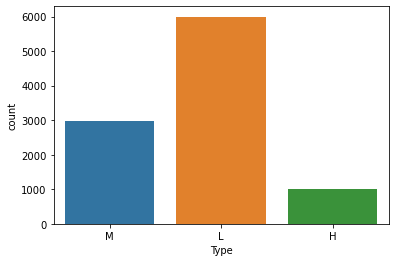

In [20]:
sns.countplot(x='Type',data=data1)
pd.crosstab(data1['Type'], columns='count')

Machine failure,0,1
Type,,
H,978,21
L,5760,235
M,2903,83


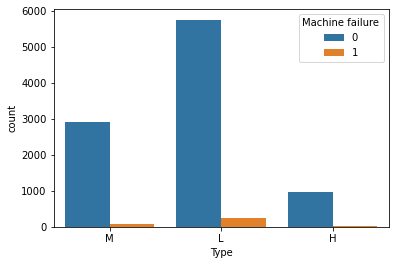

In [22]:
sns.countplot(x='Type',hue='Machine failure', data=data1) # more failure for low quality product.
pd.crosstab(data1['Type'], columns=data1['Machine failure'])

col_0,count
Machine failure,
0,9661
1,339


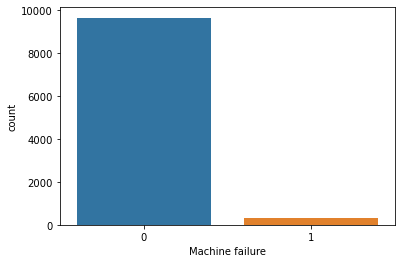

In [9]:
# counting machine failures.
sns.countplot(data1['Machine failure'])
pd.crosstab(data1['Machine failure'], columns='count')

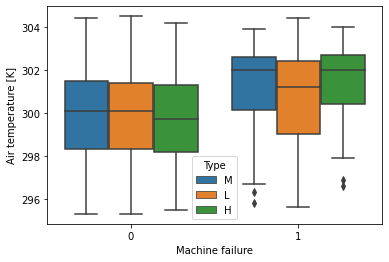

In [13]:
# lets see failure and temperature relation.
sns.boxplot(x='Machine failure',y='Air temperature [K]',hue='Type', data=data1) # No major impact 

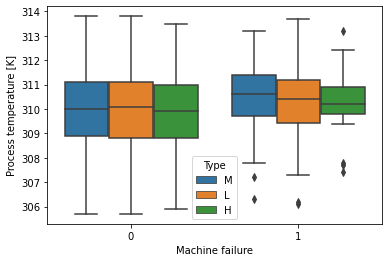

In [14]:
sns.boxplot(x='Machine failure',y='Process temperature [K]',hue='Type', data=data1)  # No major impact 

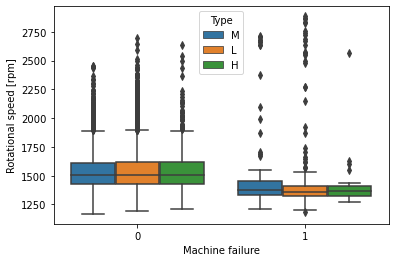

In [15]:
# Relation between failure and speed of rotation 
sns.boxplot(x='Machine failure',y='Rotational speed [rpm]',hue='Type', data=data1) 
# we can see that there more outliers here and speed of rotation is less in failure comapred to non failire.

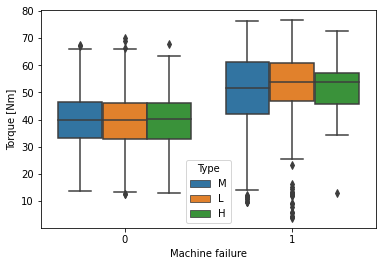

In [16]:
# Relation between machine failiure and torque
sns.boxplot(x='Machine failure',y='Torque [Nm]',hue='Type', data=data1)# little impact 
# Torque is same for non-failure and there variation in torque at the time of failure.

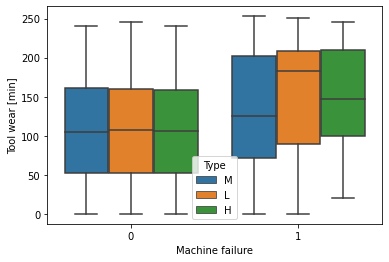

In [17]:
#There are little chances machien may fail beacuse of tool  wear.
sns.boxplot(x='Machine failure',y='Tool wear [min]',hue='Type', data=data1) # ''

In [23]:
# Assaign the dependent and independt variable
x=data1.drop(columns=['Machine failure'], inplace=False)
y=data1['Machine failure']


In [24]:
# we need to split the data, hence inport the data.
from sklearn.model_selection import train_test_split

In [25]:
train_x,test_x,train_y,test_y=train_test_split(x,y, test_size=0.3,random_state=3)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)


(7000, 6) (3000, 6) (7000,) (3000,)


In [26]:
#lets find out the numerical columns and categorical columns.
num_cols = [col for col in train_x.columns if train_x[col].dtypes!='O']
print(num_cols)


['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [27]:
cat_cols = [col for col in train_x.columns if train_x[col].dtypes == 'O']
print(cat_cols)

['Type']


### creatting transformer and impute  miising values

In [29]:
# first import the scikit Pipeline 
# then import simple imputer to fill missing values 
# also need to import robust scaler and one hot encoder for numeric and categorical variables
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [30]:
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('rob_num', RobustScaler())
])

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [31]:
#import column transformer so we can make transformer.

from sklearn.compose import ColumnTransformer
#import missing indicator
from sklearn.impute import MissingIndicator

In [32]:

preprocessor = ColumnTransformer([
    ('mi', MissingIndicator(), train_x.columns),
    ('pp_num', pp_num, num_cols),
    ('pp_cat', pp_cat, cat_cols)
])

In [33]:
# just to see data after fitting and transforming
xt = preprocessor.fit_transform(train_x)
xt


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [34]:
# making data frame to understand 
pd.DataFrame(xt).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.56250,0.590909,-0.211640,-0.007407,0.407407,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.59375,-0.500000,-0.867725,0.281481,0.574074,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.68750,0.409091,0.216931,-0.333333,-0.361111,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,-0.318182,-0.243386,0.288889,-0.648148,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.56250,0.272727,-0.132275,0.525926,-0.379630,0.0,1.0,0.0,0.0


In [35]:

# calculate the null values after preprocessing
pd.DataFrame(xt).isnull().sum().sum()

0

In [37]:
# lets check the test data
test_x.head() # as it is not changed into numbers

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
5876,L,301.5,311.1,1426.0,52.1,121.0
6555,H,301.5,310.7,1394.0,46.7,130.0
1448,M,299.0,310.3,1657.0,31.0,70.0
3351,L,301.4,310.8,1680.0,31.4,185.0
231,L,298.3,308.4,1408.0,43.1,177.0


In [40]:
test_x.isnull().sum()

Type                        3
Air temperature [K]         3
Process temperature [K]     8
Rotational speed [rpm]     28
Torque [Nm]                18
Tool wear [min]             6
dtype: int64

In [38]:
# To encode it into numbers call pipline called preprocessor
preprocessor.transform(test_x)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
pd.DataFrame(preprocessor.transform(test_x)) # making data frame fot test data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.43750,0.454545,-0.417989,0.896296,0.111111,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.43750,0.272727,-0.587302,0.496296,0.194444,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.34375,0.090909,0.804233,-0.666667,-0.361111,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.40625,0.318182,0.925926,-0.637037,0.703704,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.56250,-0.772727,-0.513228,0.229630,0.629630,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,-1.09375,-0.954545,2.502646,-1.311111,0.916667,0.0,1.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.87500,1.000000,1.608466,-1.111111,0.657407,0.0,0.0,1.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,-0.84375,-0.500000,0.952381,-0.688889,0.629630,0.0,0.0,1.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.68750,0.636364,1.529101,-1.029630,-0.944444,0.0,1.0,0.0,0.0


In [42]:
#check if test have any null values 
pd.DataFrame(preprocessor.transform(test_x)).isnull().sum().sum()

0

# Now create the model

In [43]:
# import the model from libraries
from sklearn.linear_model import LogisticRegression

In [44]:
# creating the instance of the model
pipe_model1= Pipeline([('preprocessor', preprocessor),('LR_model',LogisticRegression())])

In [45]:
#fitting the training data on model
pipe_model1.fit(train_x,train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')),
                                                 ('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   

In [48]:
# lets predict the outcome
pipe_predict1=pipe_model1.predict(test_x)

In [59]:
# lets chck the accuracy of th model1
LR_score=pipe_model1.score(test_x,test_y)
LR_score

0.969

# decision tree classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
pipe_model2 = Pipeline([
    (('preprocessor', preprocessor)),
    ('DT_model', DecisionTreeClassifier())
])

In [55]:
pipe_model2.fit(train_x, train_y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')),
                                                 ('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   

In [67]:

pipe_pred2=pipe_model2.predict(test_x)

In [61]:

DT_score=pipe_model2.score(test_x, test_y)
DT_score

0.9756666666666667

# forest model

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
pipe_model3 = Pipeline([
    (('preprocessor', preprocessor)),
    ('Forest_model', RandomForestRegressor(n_estimators=300
                                                 ,max_depth=10))
])

In [64]:
pipe_model3.fit(train_x, train_y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')),
                                                 ('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   

In [69]:
pipe_pred3=pipe_model3.predict(test_x)

In [78]:

forest_score=pipe_model3.score(test_x, test_y)
forest_score

0.6484703996940907

In [81]:
model1= 
model2=''
model3=''

In [88]:
model_score = 'logistic regression : {}, decision tree classifier: {}, random forest regressor: {}'.format(LR_score,DT_score,forest_score)

In [89]:
model_score

'logistic regression : 0.969, decision tree classifier: 0.9756666666666667, random forest regressor: 0.6484703996940907'

### DEcision tree has more accuracy